In [1]:
from utils import collect, add_info
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np


sns.set_context("talk")
sns.set_style("ticks")


In [10]:
df_image=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/runs_supcon")).query("Network=='resnet18' and Epochs<101")
df_image["Loss"]=df_image["SupCon Loss"]
df_image

,Amda,Augmix,Batch Size,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,SupCon Loss,Supcon Amda,Teacher,Temperature,WeightDecay,kd_T,kd_mixture
120,False,True,1024.0,False,40,14.920002,49.244004,67.414641,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.10,0.0002,None,None
120,False,False,1024.0,False,40,11.960000,51.904535,66.528711,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.10,0.0002,None,None
270,False,False,512.0,False,90,18.540001,53.672266,71.087688,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
120,False,True,1024.0,False,40,12.059999,42.984802,62.752199,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.07,0.0002,None,None
120,True,True,1024.0,True,40,15.660000,47.430134,67.020175,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.10,0.0002,None,None
270,False,False,512.0,False,90,12.000000,42.709869,62.428868,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.07,0.0002,None,None
300,False,True,512.0,False,100,19.379997,53.356266,71.158820,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,512.0,False,100,22.619998,64.803469,76.758924,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
120,False,True,1024.0,False,40,15.380001,50.584531,68.132436,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,512.0,False,100,11.680001,42.942131,62.293068,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,NaN,0.07,0.0002,None,None


In [7]:
df_std=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/distillation/")).query("Network=='resnet18' & Teacher=='AMDA ResNet50' and Loss=='KnowledgeDistill'")
df_std

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
270,False,False,False,90,9.719998,38.957065,57.287896,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,0.9


In [9]:
path_baseline=Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/baselines")
df_baseline=collect(path_baseline).query("Network=='resnet18' & Scaling==1 & not Amda")
df_baseline

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
270,False,False,False,90,11.739999,51.112539,68.669167,0.1,StandardLoss,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,0.0002,None,None


In [26]:
df_sup=df_image.query("Loss=='SupCon'")
df_kd_sup=df_image.query("Loss=='KD_SupCon'")
df_temp=df_sup.append(df_kd_sup)
df_plot=df_temp.append(df_std)
df_plot.sort_values(by=["Loss"], ascending=False)
df_plot

,Amda,Augmix,Batch Size,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,SupCon Loss,Supcon Amda,Teacher,Temperature,WeightDecay,kd_T,kd_mixture
270,False,False,512.0,False,90,18.540001,53.672266,71.087688,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,True,512.0,False,100,19.379997,53.356266,71.158820,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,512.0,False,100,22.619998,64.803469,76.758924,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
90,True,True,1024.0,True,30,19.840002,53.872800,71.676150,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
90,True,True,512.0,True,30,19.300002,51.586401,70.466891,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
270,False,True,1024.0,False,90,26.899999,49.015194,69.755560,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,True,NaN,0.10,0.0002,None,None
120,False,True,1024.0,False,40,19.720000,54.741871,71.436885,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
270,False,True,512.0,False,90,18.460000,53.044266,70.557424,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
90,True,True,1024.0,True,30,27.300000,47.998136,69.471028,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,True,NaN,0.10,0.0002,None,None
90,True,True,512.0,True,30,19.000000,51.267999,69.936627,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None


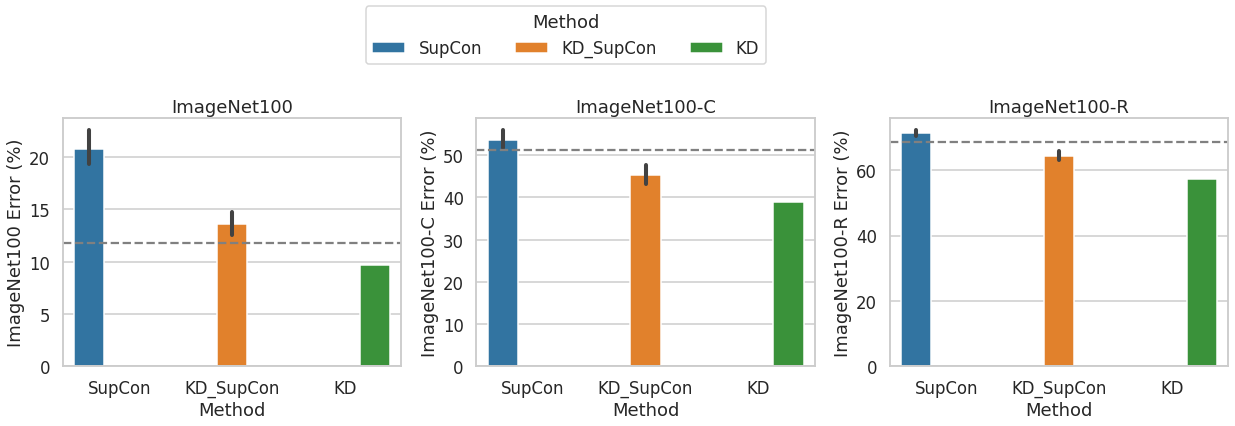

In [27]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5))
df_plot=df_plot.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]):
    sns.barplot(data=df_plot, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Method")
    ax.set_ylabel(error + " (%)")
    #if error=="Cifar100-C Error":
        #ax.set_ylim(0,51)
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/supcon_img100_std.pdf")